In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Viewing the dataset as a whole. Its shape and first few columns of the dataset.
# Dataset: Placement statistics of few randomly picked students from XYZ college.

df=pd.read_csv("Placement_Data_Full_Class.csv")
df.columns=df.columns.str.upper()
print("Shape:",df.shape)
df.head()

Shape: (215, 15)


,SL_NO,GENDER,SSC_P,SSC_B,HSC_P,HSC_B,HSC_S,DEGREE_P,DEGREE_T,WORKEX,ETEST_P,SPECIALISATION,MBA_P,STATUS,SALARY
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [60]:
# Checking for null values

print("Null values in: ")
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f"{col}: {df[col].isnull().sum()}")

Null values in: 
SALARY: 67


In [61]:
# Handling missing values by imputation

df['SALARY']=df['SALARY'].fillna(df['SALARY'].median())

In [62]:
# Handling duplicates

df.drop_duplicates(inplace=True)

In [63]:
categorical=['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']
categorical=[c.upper() for c in categorical]
numerical=['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']
numerical=[c.upper() for c in numerical]

In [64]:
# Detect and treat outliers using appropriate statistical methods.

for col in numerical:
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [ ]:
# Verify the new cleaned dataset. There are no null values present now.

print(df.shape)
print("Null Values:")
print(f'{df.isnull().sum()}')
df.head()

(215, 15)
Null Values:
SL_NO             0
GENDER            0
SSC_P             0
SSC_B             0
HSC_P             0
HSC_B             0
HSC_S             0
DEGREE_P          0
DEGREE_T          0
WORKEX            0
ETEST_P           0
SPECIALISATION    0
MBA_P             0
STATUS            0
SALARY            0
dtype: int64


,SL_NO,GENDER,SSC_P,SSC_B,HSC_P,HSC_B,HSC_S,DEGREE_P,DEGREE_T,WORKEX,ETEST_P,SPECIALISATION,MBA_P,STATUS,SALARY
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,331250.0


In [ ]:
# Summary statistics (mean, median, mode, variance, skewness, etc.)

summary_stats=df.describe()
skewness=df.skew(numeric_only=True)

print("Data Description:") 
print(summary_stats)
print("\nSkewness:")
print(skewness)

Data Description:
            SL_NO       SSC_P       HSC_P    DEGREE_P     ETEST_P       MBA_P  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.271535   66.358558   72.100558   62.278186   
std     62.209324   10.827205   10.738482    7.321524   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   89.400000   91.150000   88.500000   98.000000   77.890000   

              SALARY  
count     215.000000  
mean   268254.651163  
std     33395.830882  
min    200000.000000  
25%    250000.000000  
50%    265000.000000  
75%    282500.000000  
max    331250.000000  

Skewness:
SL_NO       0.000000
SSC_P      -0

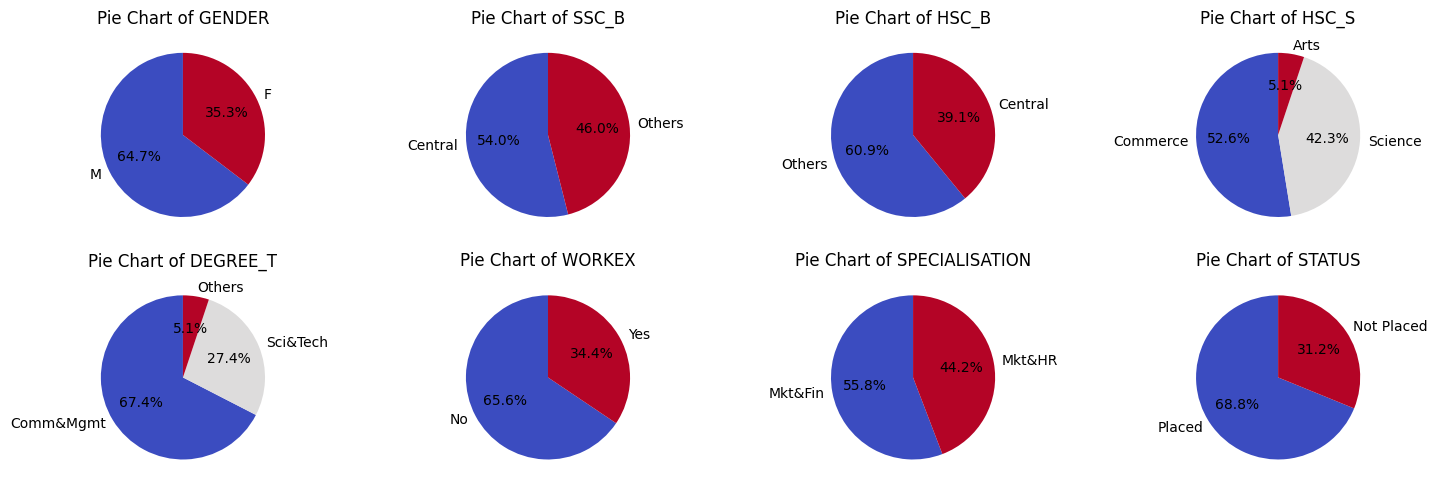

In [67]:
# Frequency distributions for categorical variables.

frequency_distributions = {col: df[col].value_counts() for col in categorical}

fig, axes = plt.subplots(2, 4, figsize=(15, 5))
axes = axes.flatten()

for i, col in enumerate(categorical):
    df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i], startangle=90, cmap='coolwarm')
    axes[i].set_title(f'Pie Chart of {col}')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

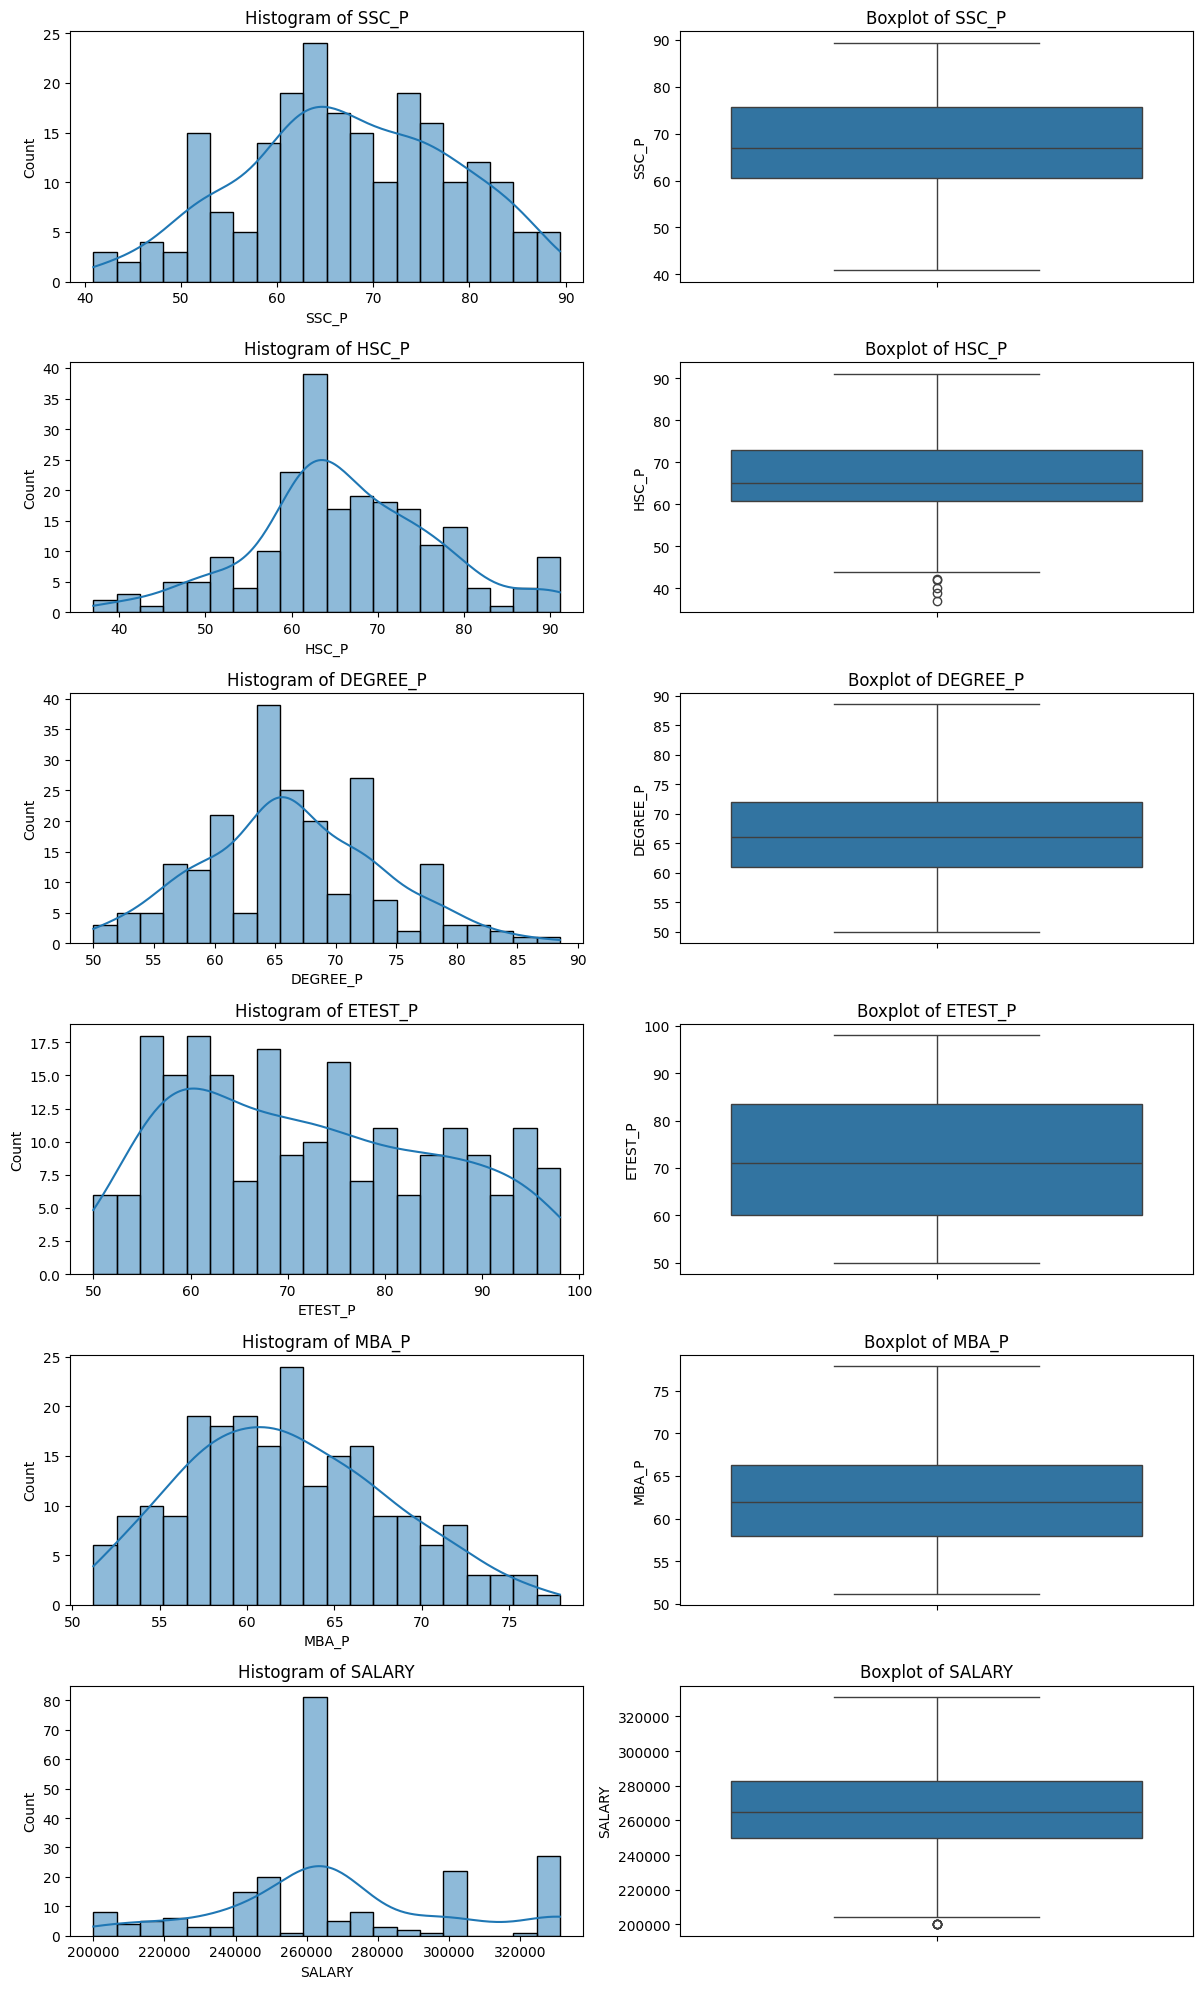

In [71]:
# Histograms and box plots to visualize distributions

fig, axes = plt.subplots(6, 2, figsize=(12, 20))

for i, col in enumerate(numerical):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')
    
    sns.boxplot(y=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

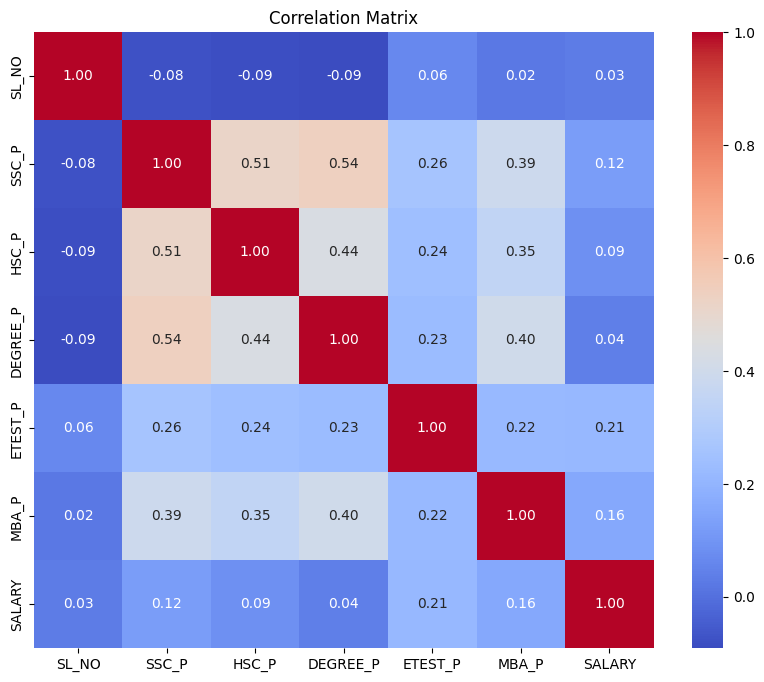

In [74]:
# Correlation matrix to identify relationships between numerical variables

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

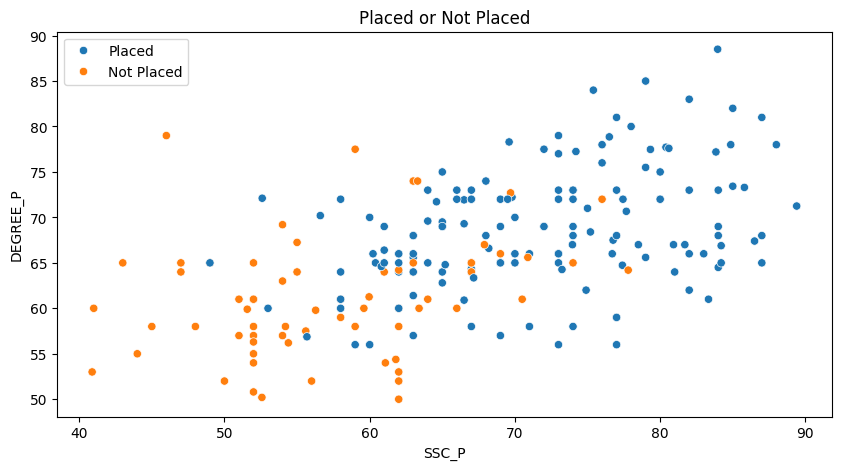

In [ ]:
# Scatter plots for continuous variable relationships. The scatter plot imply that those 
# who got good percentile in both degree and ssc were likely to get placed.

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['SSC_P'], y=df['DEGREE_P'], hue=df['STATUS'])
plt.title("Placed or Not Placed")
plt.xlabel("SSC_P")
plt.ylabel("DEGREE_P")
plt.legend()
plt.show()

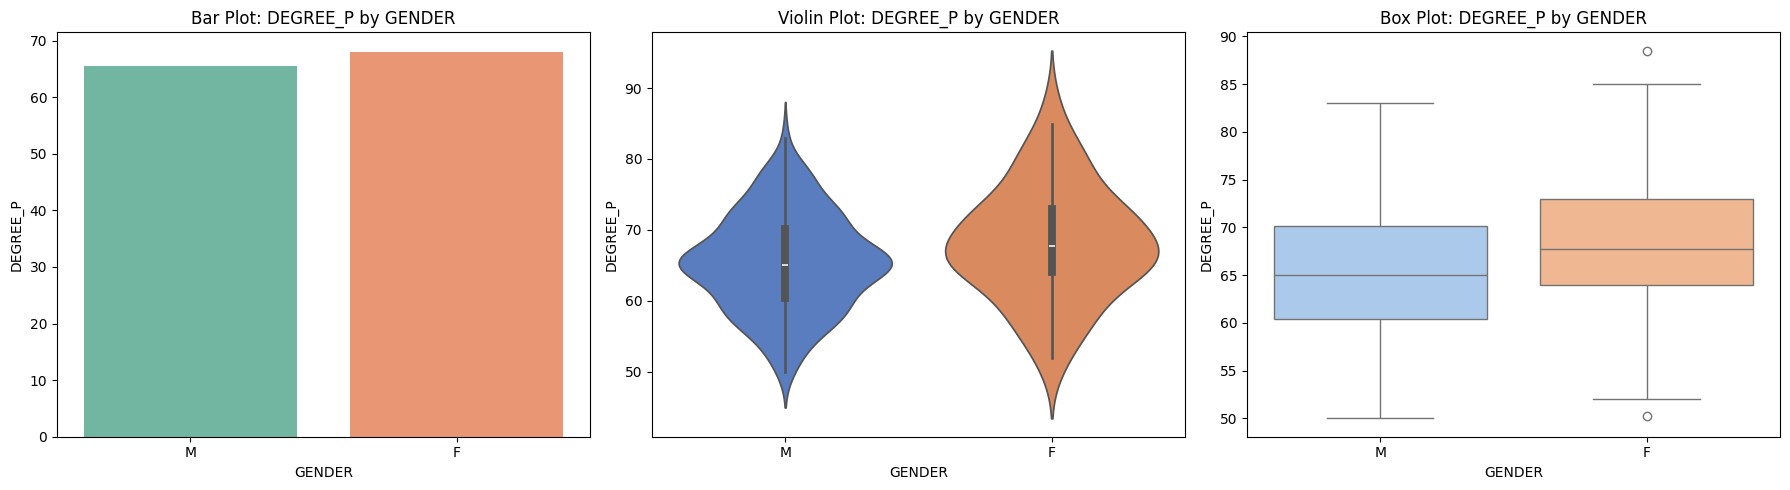

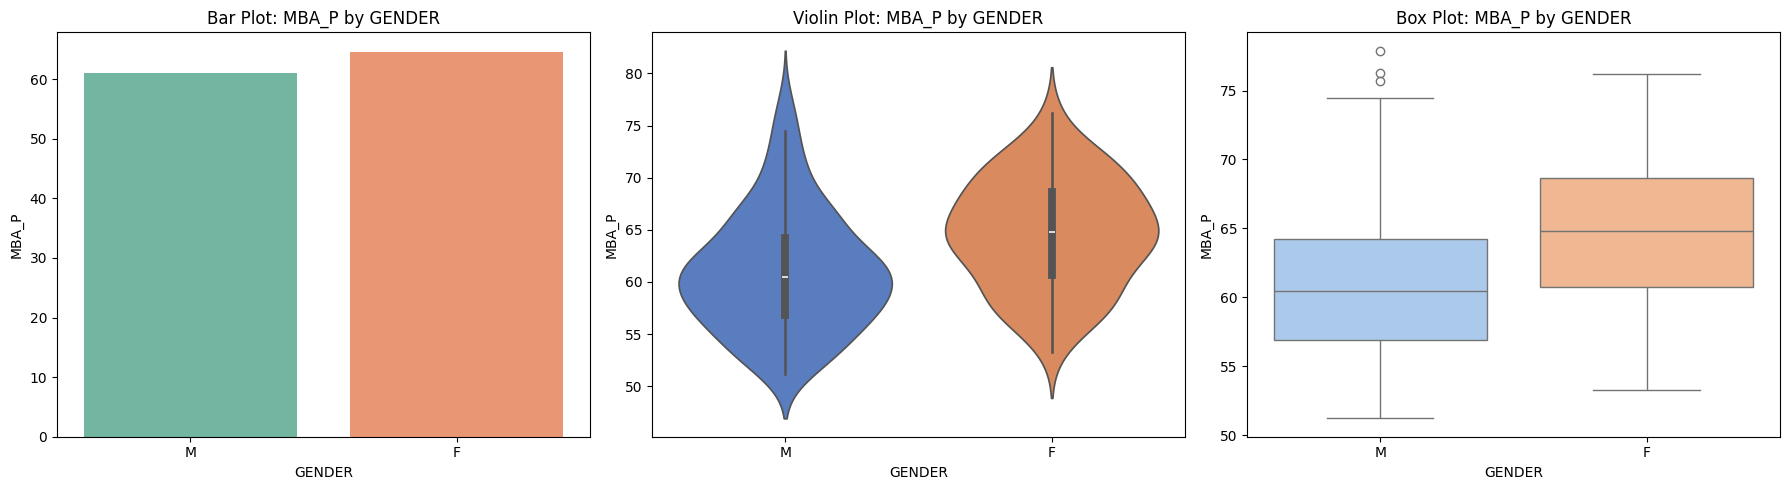

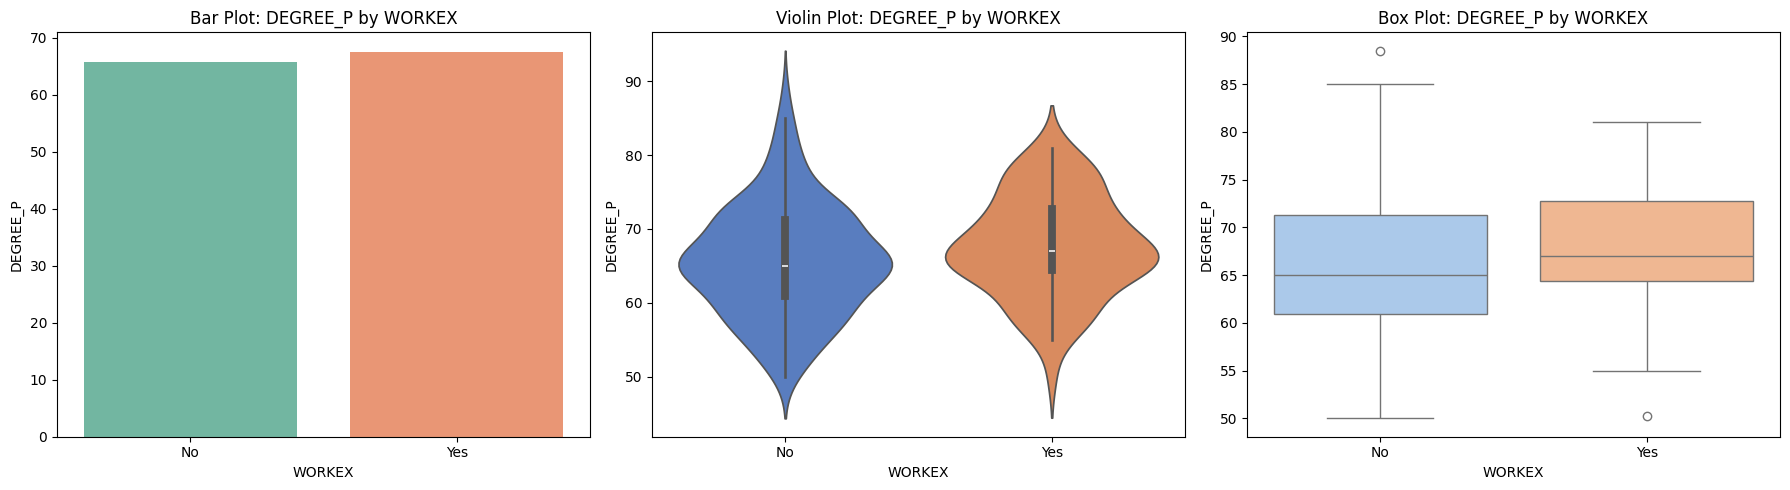

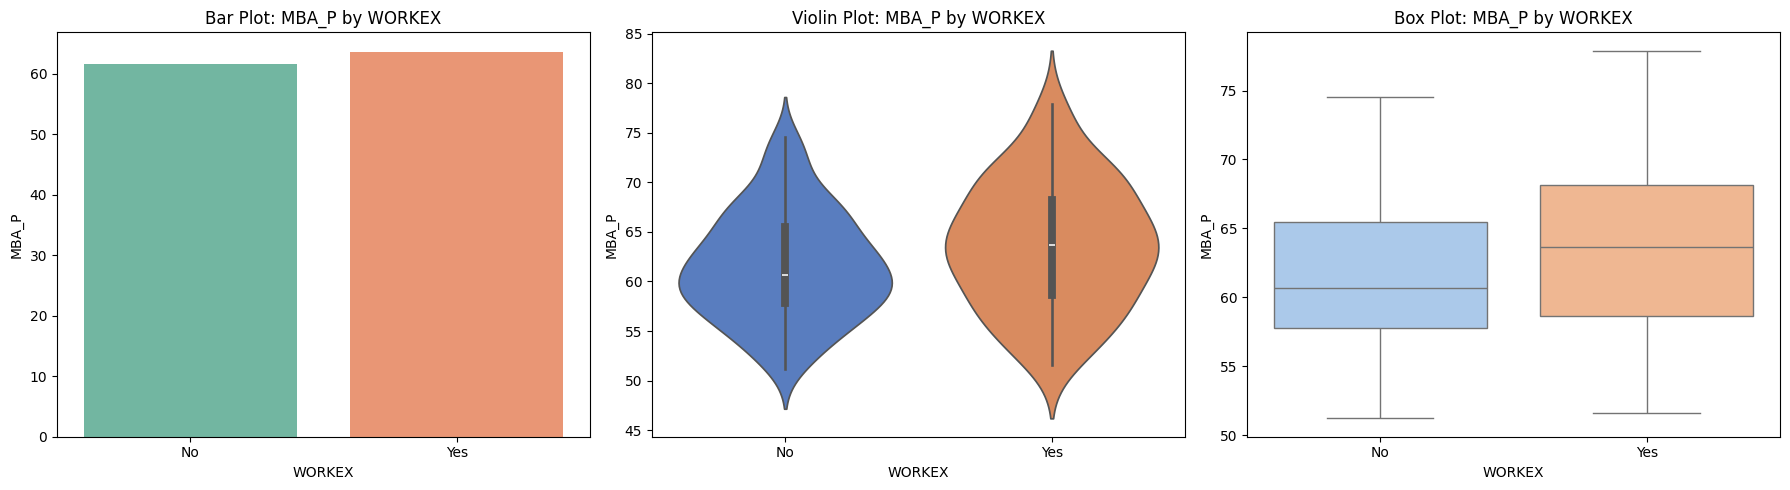

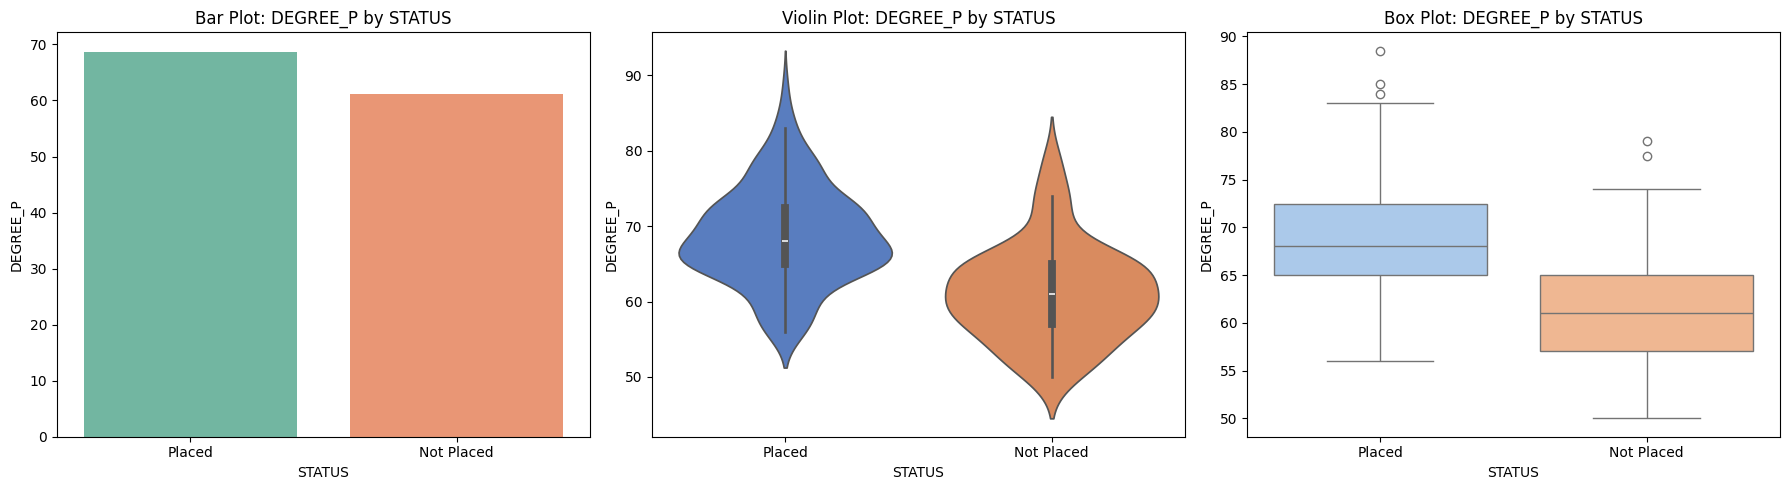

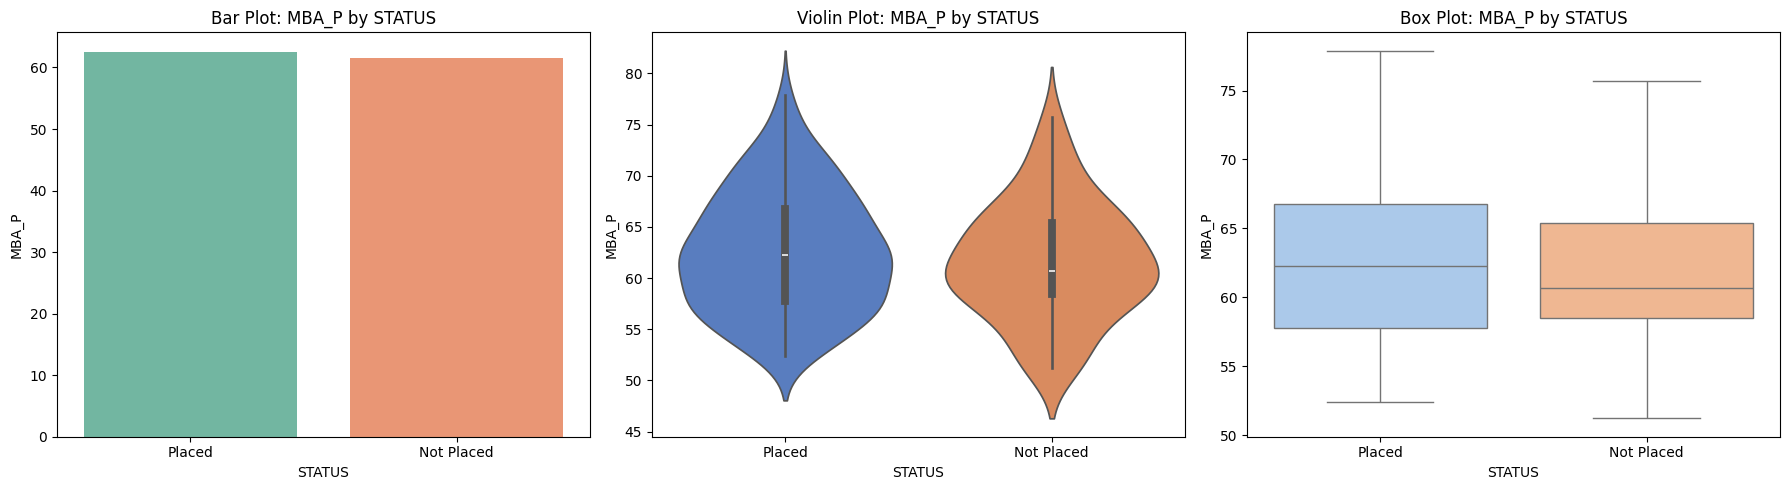

In [95]:
# Bar, Violin and Box plots are plotted for one numerical variable against one categorical variable. 
# Here, only genter and status(placed or not) are taken as categorical and percentiles in degree and mba as 
# numerical are taken into consideration to limit the number of plots.

for cat in ['GENDER', 'WORKEX', 'STATUS']:
    for num in ['DEGREE_P','MBA_P']:
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        
        sns.barplot(x=df[cat], y=df[num], ax=axes[0], errorbar=None, palette='Set2', hue=df[cat], legend=False)
        axes[0].set_title(f'Bar Plot: {num} by {cat}')
        
        sns.violinplot(x=df[cat], y=df[num], ax=axes[1], palette='muted', hue=df[cat], legend=False)
        axes[1].set_title(f'Violin Plot: {num} by {cat}')
        
        sns.boxplot(x=df[cat], y=df[num], ax=axes[2], palette='pastel', hue=df[cat], legend=False)
        axes[2].set_title(f'Box Plot: {num} by {cat}')
        
        plt.tight_layout()
        plt.show()

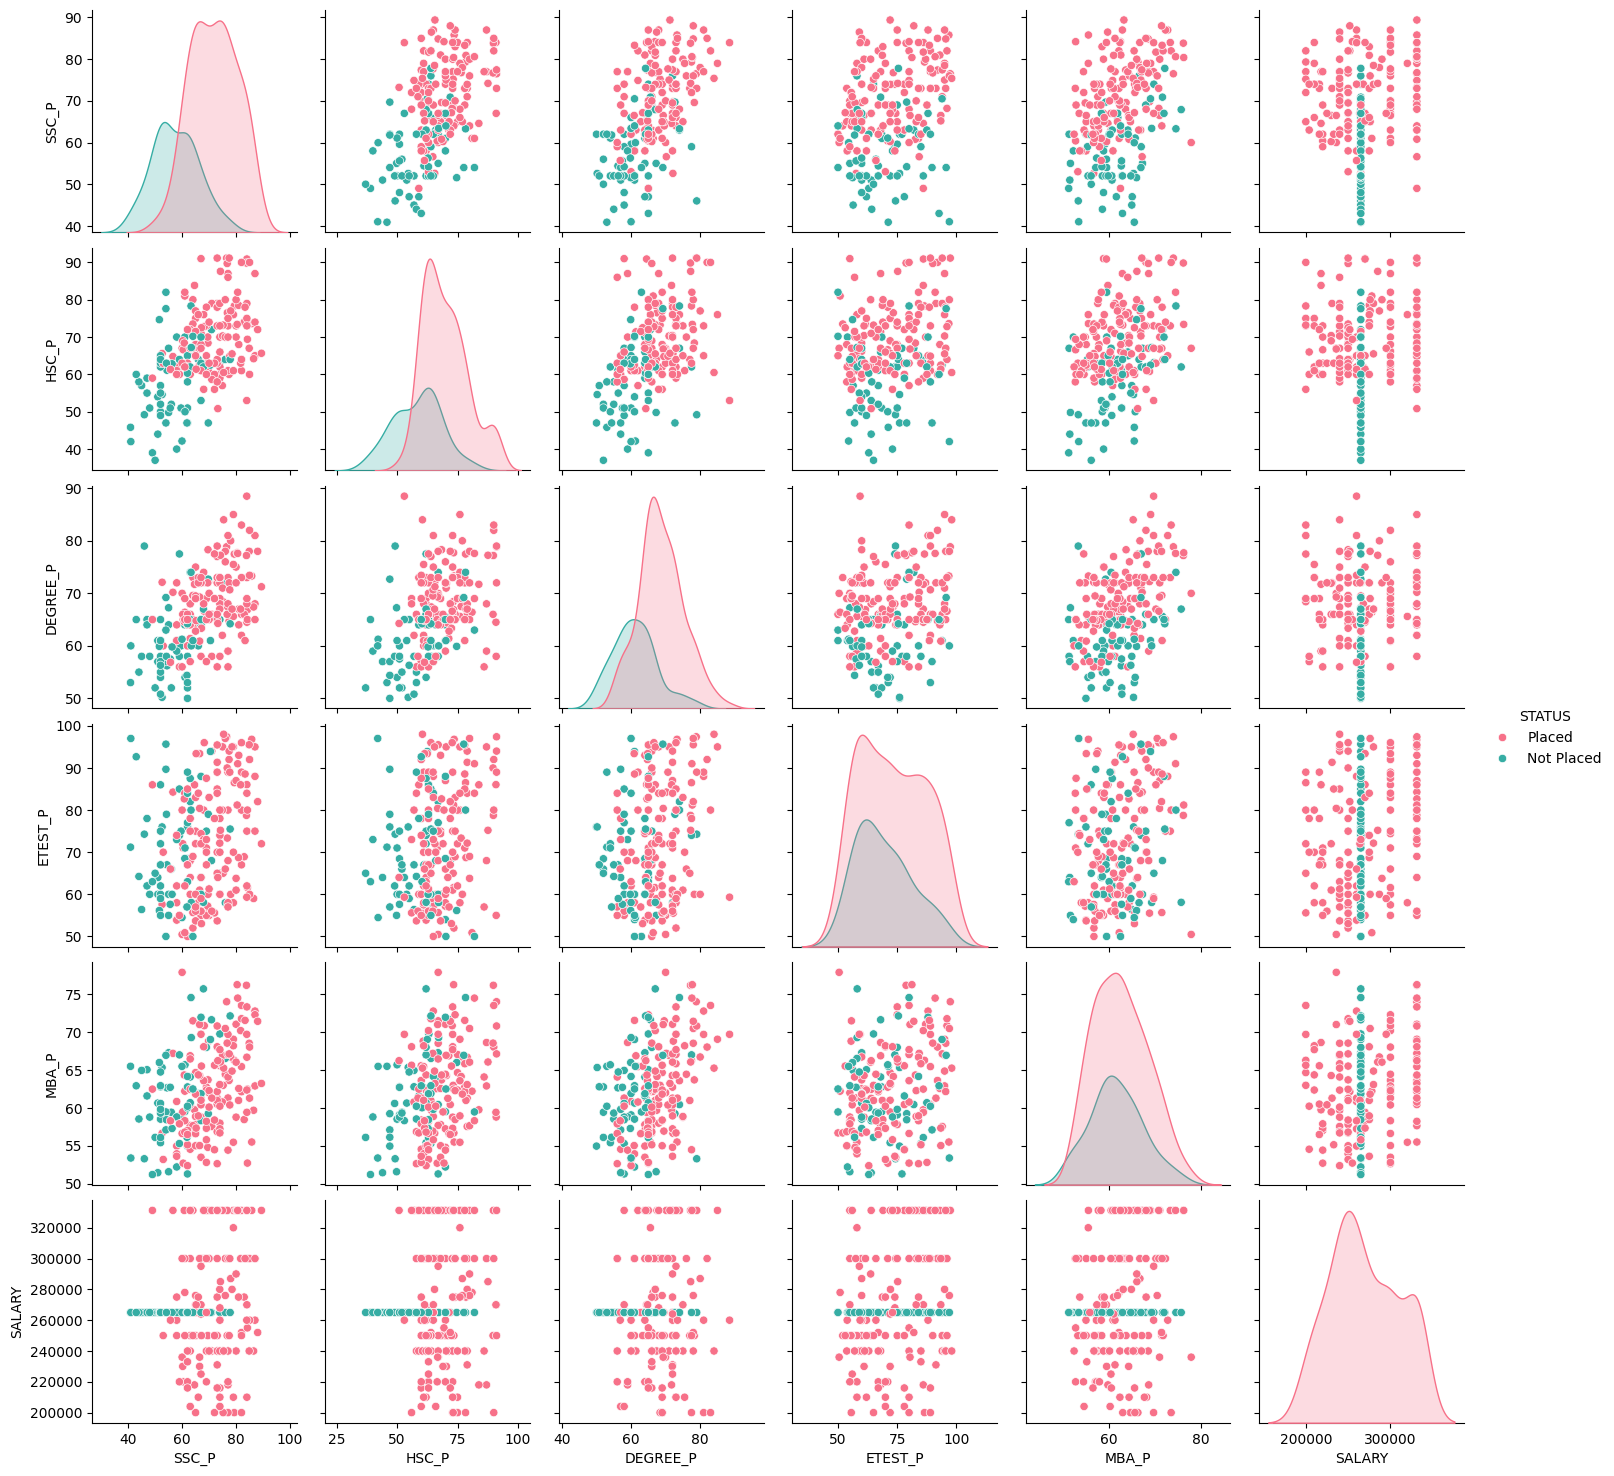

In [ ]:
# Pair Plots of one numerical variable against every other numerical variable. 
# The hue is added for understanding which statistics largely determined the status of getting placed.

sns.pairplot(df[numerical + ['STATUS']], hue='STATUS', diag_kind='kde', palette='husl')
plt.show()

<Figure size 2000x4000 with 0 Axes>

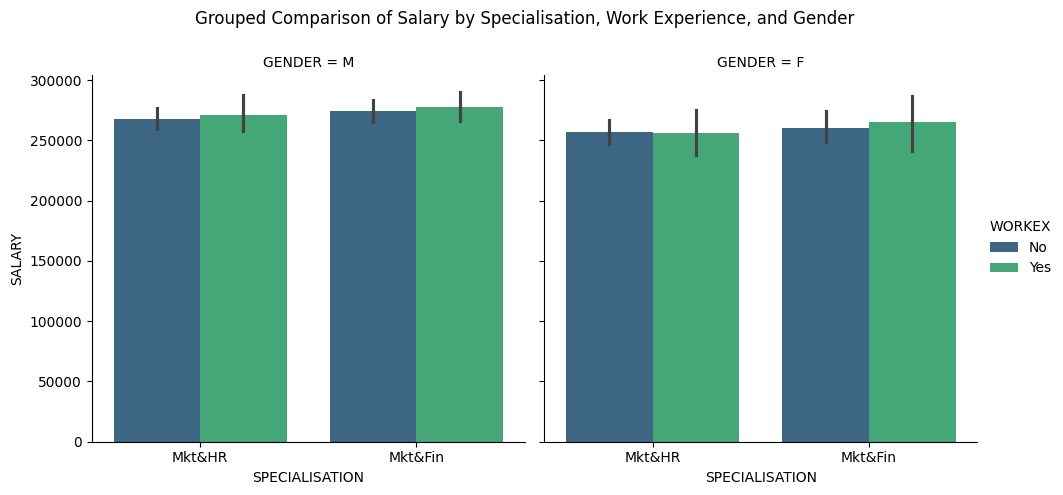

In [ ]:
# Grouped comparisons to identify combined effects of multiple features. 
# Here the example comparison is between specialisation. workex and gender. This implies that workex is not largely affecting the salary of people.

plt.figure(figsize=(20, 40))
g = sns.catplot(x='SPECIALISATION', y='SALARY', hue='WORKEX', col='GENDER', data=df, kind='bar', palette='viridis')
g.fig.subplots_adjust(top=0.85)  # Adjust space for title
g.fig.suptitle('Grouped Comparison of Salary by Specialisation, Work Experience, and Gender')
plt.show()